# 增加學習層數至五層及調整lerning Rate至0.1

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. 欣賞數據集內容

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


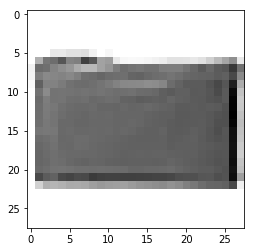

In [5]:
n = 1234
print('這是',class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

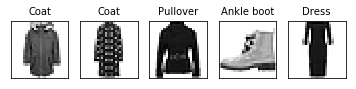

In [6]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)  #1 row & 5 col & current position is 1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
28*28

784

In [12]:
np.max(x_train[n]) #最大像素

255

In [13]:
print(set(y_train))#有幾類

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# 資料處理

In [14]:
x_train = x_train.reshape(len(x_train), 784)

In [15]:
x_test = x_test.reshape(len(x_test),784)

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 打造神經網路

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
model = Sequential()

In [21]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [22]:
model.add(Dense(100, activation='relu'))

In [23]:
model.add(Dense(100, activation='relu'))

In [24]:
model.add(Dense(100, activation='relu'))

In [25]:
model.add(Dense(100, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax'))

# 4. 組裝我們的神經網路

In [27]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy']) #metrics用來告訴訓練時的正確率

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 119,910
Trainable params: 119,910
Non-trainable params: 0
__________________________________________________

In [29]:
100*784+100

78500

# 5. 訓練

In [30]:
model.fit(x_train, y_train, batch_size=100, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0899 - accuracy: 0.1033
Epoch 2/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0895 - accuracy: 0.1203
Epoch 3/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0891 - accuracy: 0.1642
Epoch 4/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0886 - accuracy: 0.1827
Epoch 5/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0880 - accuracy: 0.1829
Epoch 6/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0872 - accuracy: 0.1824
Epoch 7/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0860 - accuracy: 0.1920
Epoch 8/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0846 - accuracy: 0.2210
Epoch 9/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0828 - accuracy: 0.2700
Epoch 10/50
60

# 6. 訓練成果

In [31]:
result = model.predict_classes(x_test)

神經網路預測是: Sneaker


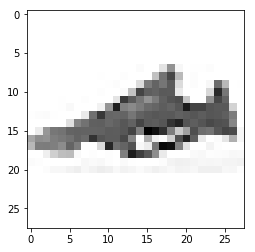

In [32]:
n = 999

print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')